In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=e083a4479565d8625b631a129417fd4f9a9c0a7ce4d05ca6cb8f9bf0d03838a5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import gensim
import pandas as pd
from langdetect import detect, LangDetectException
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import TfidfModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lda_df = pd.read_csv('preprocess_final.csv')

In [ ]:
lda_df["select_tokens"]

0      ['audience', 'cheering', 'applauding', 'hello'...
1      ['im', 'funnier', 'told', 'introduce', 'heres'...
2      ['netflix', 'standup', 'comedy', 'special', 't...
3      ['kevin', 'bridges', 'overdue', 'catchup', 'co...
4      ['get', 'knees', 'jacqueline', 'novak', 'trans...
                             ...                        
468    ['jammin', 'new', 'york', 'george', 'carlins',...
469    ['australian', 'comedian', 'jim', 'jefferies',...
470    ['hello', 'im', 'thomas', 'im', 'glad', 'meet'...
471    ['complaints', 'grievances', 'hbo', 'standup',...
472    ['full', 'transcript', 'bad', 'ya', 'final', '...
Name: select_tokens, Length: 473, dtype: object

In [ ]:
lda_df.shape

(473, 15)

In [ ]:
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return None


lda_df['language'] = lda_df['transcript'].apply(detect_language)


In [ ]:
lda_df.shape

(473, 16)

In [ ]:
lda_df["language"].value_counts()

language
en    464
it      7
es      2
Name: count, dtype: int64

In [ ]:
non_english_indices = lda_df[lda_df['language'] != 'en'].index.tolist()

In [ ]:
lda_df.drop(non_english_indices, inplace=True)

In [ ]:
lda_df.shape

(464, 16)

In [ ]:
len(lda_df["select_tokens"])

464

In [ ]:
type(lda_df["select_tokens"][0])

str

In [ ]:
from ast import literal_eval

In [ ]:
lda_df['select_tokens_lda'] = lda_df['select_tokens'].apply(literal_eval)

In [ ]:
type(lda_df["select_tokens_lda"][0])

list

In [ ]:
#lda_df["select_tokens_lda"][0]

In [ ]:
data_words = lda_df["select_tokens_lda"].tolist()

In [ ]:
len(data_words)

464

In [ ]:
#bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

In [ ]:
#bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)#results not great

In [ ]:
#print(trigram_mod[bigram_mod[data_words[2]]])

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
import spacy

In [ ]:
!python -m spacy validate

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.7.4) =================
ℹ spaCy installation: /usr/local/lib/python3.10/dist-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.7.2,<3.8.0   3.7.1   ✔



In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
type(nlp)

spacy.lang.en.English

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

#def make_bigrams(texts):
    #return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
    #return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
data_words_nostops = remove_stopwords(data_words)

In [ ]:
len(data_words_nostops)

464

In [ ]:
#data_words_bigrams = make_bigrams(data_words_nostops)

In [ ]:
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN'])

In [289]:
custom_stop_words = ["audience", "shit", "fuck", "motherfucker", "time",
                     "bitch", "thing", "word", "lot", "way", "crowd", "laugh",
                     "chuckle", "laughing", "kev", "hummus", "clap", "scooter", "pool", "ravi", "laughter", "day", "year",
                     "marshmallow", "gonzale", "roxy", "tiktok", "chicka", "romper", "booger", "dracula",  "cupid",
                      "daddy", "btch", "ass", "mama", "folk", "snoop", "weed", "applause",
                     "cause", "baby", "bit", "joke", "clapping", "whoo",
                      "ox", "bolsonaro", "sheep", "liner", "frog", "tiger", "ruie", "brazil","cunt","show","pussy",
                     "fck","fcking","gon","filmstar","rowan","headmaster","perkin","thbpth","figaro","bioody",
                     "piague","hoddededede","raptor","tit","yknow","bleep","daggum","gitrdone","parasite","bandage"]

In [290]:
data_lemmatized = [[word for word in doc if word not in custom_stop_words] for doc in data_lemmatized]

In [291]:
id2word = corpora.Dictionary(data_lemmatized)

In [292]:
texts = data_lemmatized

In [293]:
corpus = [id2word.doc2bow(text) for text in texts] #termdocumentfrequency

In [294]:
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [330]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [328]:
from pprint import pprint

In [329]:
pprint(lda_model.print_topics())

[(0,
  '0.002*"woive" + 0.002*"evoiution" + 0.002*"hannibai" + 0.001*"thinker" + '
  '0.001*"fiim" + 0.001*"battie" + 0.001*"eiephant" + 0.001*"ciever" + '
  '0.001*"spartan" + 0.001*"farming"'),
 (1,
  '0.014*"people" + 0.012*"mate" + 0.008*"mum" + 0.006*"man" + 0.005*"dog" + '
  '0.005*"world" + 0.005*"film" + 0.005*"cat" + 0.005*"sort" + 0.005*"woman"'),
 (2,
  '0.040*"people" + 0.018*"man" + 0.009*"guy" + 0.008*"country" + '
  '0.007*"world" + 0.005*"money" + 0.005*"life" + 0.004*"car" + 0.004*"name" + '
  '0.004*"kid"'),
 (3,
  '0.025*"guy" + 0.021*"people" + 0.020*"man" + 0.014*"woman" + 0.010*"kid" + '
  '0.009*"life" + 0.009*"girl" + 0.008*"friend" + 0.007*"love" + 0.005*"dog"'),
 (4,
  '0.001*"stalker" + 0.001*"pubis" + 0.001*"shutdown" + 0.001*"cybersecurity" '
  '+ 0.001*"thatch" + 0.001*"tasty" + 0.001*"leonardo" + 0.001*"rebounder" + '
  '0.000*"bulb" + 0.000*"poopy"')]


In [324]:
def compute_coherence_values_test(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, random_state=100,
                                                chunksize=100, passes=10, per_word_topics=True, id2word=id2word)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [325]:
import matplotlib.pyplot as plt

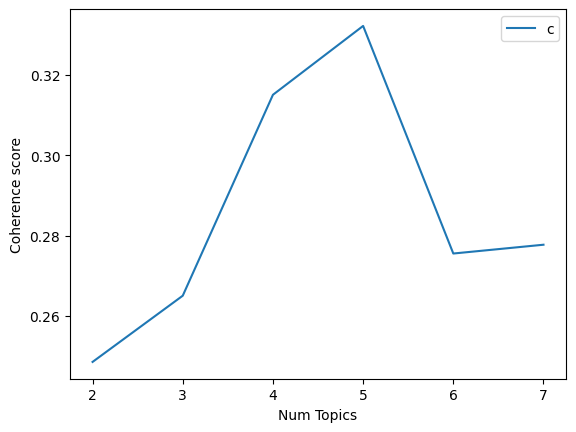

In [326]:
model_list, coherence_values = compute_coherence_values_test(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=8, step=1)

# Show graph
limit = 8; start = 2; step = 1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [331]:
#Baseline model - n_topics = 4

In [332]:
#function with all hyperparameters included

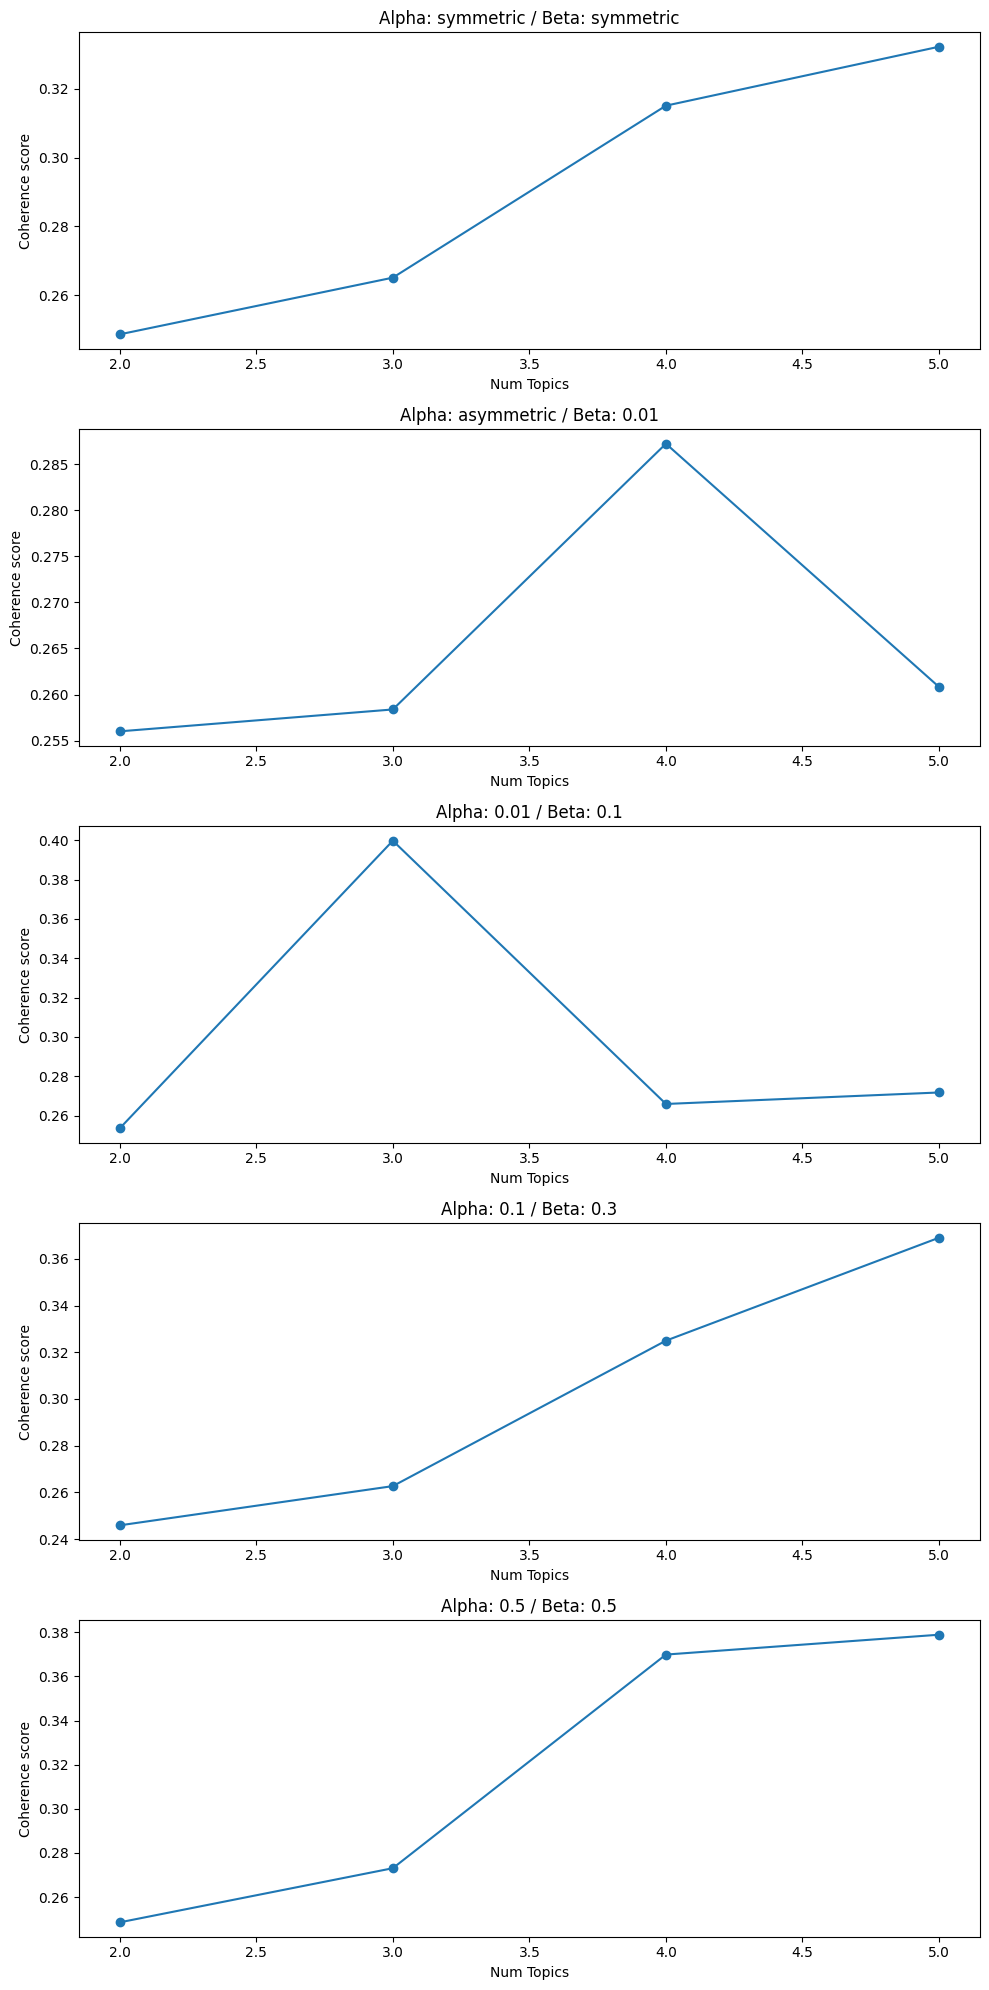

In [359]:
import matplotlib.pyplot as plt
import gensim
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, alpha, beta, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                                                alpha=alpha, eta=beta, random_state=100,
                                                chunksize=100, passes=10, per_word_topics=True)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


alpha_values = ['symmetric', 'asymmetric', 0.01, 0.1, 0.5]
beta_values = ['symmetric', 0.01, 0.1, 0.3, 0.5]


limit = 6; start = 2; step = 1
x = range(start, limit, step)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):
    _, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized,
                                                   alpha=alpha, beta=beta, start=start, limit=limit, step=step)

    axes[i].plot(x, coherence_values, marker='o')
    axes[i].set_title(f'Alpha: {alpha} / Beta: {beta}')
    axes[i].set_xlabel("Num Topics")
    axes[i].set_ylabel("Coherence score")

plt.tight_layout()
plt.show()


In [400]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha=0.5,eta = 0.5,
                                           per_word_topics=True)

In [401]:
pprint(lda_model.print_topics())

[(0,
  '0.001*"evoiution" + 0.001*"woive" + 0.001*"farming" + 0.001*"thinker" + '
  '0.001*"hannibai" + 0.001*"trumpet" + 0.001*"ciever" + 0.001*"eiephant" + '
  '0.001*"fiim" + 0.001*"battie"'),
 (1,
  '0.015*"mate" + 0.010*"mum" + 0.005*"film" + 0.004*"mime" + 0.004*"bloke" + '
  '0.004*"sort" + 0.003*"panda" + 0.003*"lad" + 0.003*"arse" + '
  '0.002*"glasgow"'),
 (2,
  '0.026*"people" + 0.012*"country" + 0.007*"world" + 0.005*"war" + '
  '0.005*"drug" + 0.004*"president" + 0.004*"news" + 0.004*"government" + '
  '0.004*"gun" + 0.003*"police"'),
 (3,
  '0.026*"people" + 0.021*"guy" + 0.021*"man" + 0.012*"woman" + 0.009*"kid" + '
  '0.009*"life" + 0.007*"girl" + 0.007*"friend" + 0.006*"love" + '
  '0.005*"night"')]
